In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
# from torch.utils.tensorboard import SummaryWriter
# from utils import save_checkpoint, load_checkpoint, print_examples
from load_data import get_loader
from model import CNNtoRNN


In [2]:
transform = transforms.Compose(
    [
    transforms.Resize((256,256)),
    transforms.RandomCrop((224,224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),
    ]
)

train_loader,dataset = get_loader(
    root_folder="Data/flickr8k/images",
    annotation_file="Data/flickr8k/captions.txt",
    transform = transform,
    batch_size=24,
    num_worker=1,
)

torch.backends.cudnn.benchmark = True
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
load_model = False
save_model =True

#Hyperparameters

embed_size = 300
hidden_size = 512
vocab_size = len(dataset.vocab)
num_layers = 1
learning_rate = 1e-3
num_epochs = 10

# writer = SummaryWriter("runs/flickr")
# step =0

#initialize model
model = CNNtoRNN(embed_size,hidden_size,vocab_size,num_layers).to(device)
criterion = nn.CrossEntropyLoss(ignore_index=dataset.vocab.stoi["<PAD>"])
optimizer = optim.Adam(model.parameters(),lr = learning_rate)

model.train()
print(device)

cuda


In [4]:
model = torch.load('model_best.pt')

In [3]:
import gc 
gc.collect()

26

In [65]:
for epoch in range(num_epochs):

        for idx ,(imgs,captions) in enumerate(train_loader):

            imgs = imgs.to(device)
            captions = captions.to(device)

            outputs = model(imgs,captions[:-1])
            loss = criterion(outputs.reshape(-1,outputs.shape[2]),captions.reshape(-1))

            optimizer.zero_grad()
            loss.backward(loss)
            optimizer.step()
        print(f"Epoch:{epoch}-------Loss: {loss}")

Epoch:0-------Loss: 1.8441979885101318
Epoch:1-------Loss: 1.736799716949463
Epoch:2-------Loss: 1.8802034854888916
Epoch:3-------Loss: 1.9426971673965454
Epoch:4-------Loss: 1.9923375844955444
Epoch:5-------Loss: 1.8906750679016113
Epoch:6-------Loss: 1.9641938209533691


KeyboardInterrupt: 

In [33]:
torch.save(model,'model_best.pt')

In [10]:
loss

tensor(2.0781, device='cuda:0', grad_fn=<NllLossBackward>)

In [15]:
loss_batch = []

In [5]:
import PIL
im = PIL.Image.open('Data/flickr8k/images/50030244_02cd4de372.jpg').convert('RGB')

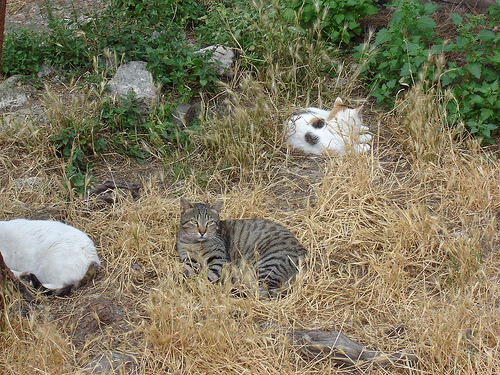

In [6]:
im

In [64]:
for wrd in train_loader.dataset[0][1]:
    print(dataset.vocab.itos[wrd.item()])

<SOS>
a
child
in
a
pink
dress
is
climbing
up
a
set
of
stairs
in
an
<UNK>
way
.
<EOS>


In [7]:
trn = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
t =trn(im).unsqueeze(0).to('cuda')
t.shape

torch.Size([1, 3, 224, 224])

In [10]:
model.caption_image(t,dataset.vocab)

['<SOS>',
 'a',
 'man',
 'in',
 'a',
 'blue',
 'shirt',
 'is',
 'standing',
 'in',
 'front',
 'of',
 'a',
 'large',
 'crowd',
 '.',
 '<EOS>']

In [31]:
model.caption_image(t,dataset.vocab)

['<SOS>',
 'a',
 'man',
 'in',
 'a',
 'white',
 'shirt',
 'and',
 'jeans',
 'is',
 'standing',
 'in',
 'front',
 'of',
 'a',
 'crowd',
 'of',
 'people',
 '.',
 '<EOS>']

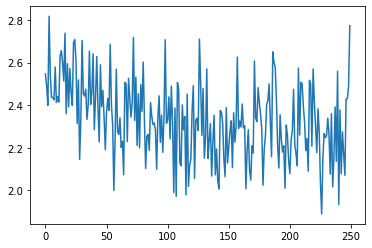

In [13]:
import matplotlib.pyplot as plt
plt.plot(loss_batch)